## Graphs

> https://www.youtube.com/playlist?list=PL_z_8CaSLPWcn5bKG8UMI0St2D5EmQszx

---

In [7]:
from typing import List
import sys

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

### Basic Implementation

In [36]:
from typing import List, Tuple, Dict, Optional

class Graph:
    """
    A class to represent an undirected graph using an edge list, adjacency matrix, and adjacency list.

    Attributes:
        edgelist (list): List of edges where each edge is represented as a tuple (a, b).
        nodeslist (list): List of unique nodes in the graph.
        adjacency_matrix (list[list]): Adjacency matrix representation of the graph.
        adjacency_list (dict): Adjacency list representation of the graph.
    """

    def __init__(self, edgelist: List[Tuple[int, int]]):
        """
        Initializes the Graph object with an edge list.

        Args:
            edgelist (list): List of edges where each edge is represented as a tuple (a, b).
        """
        self.edgelist = edgelist
        self.nodeslist = []  # Stores unique nodes in the graph
        self.adjacency_matrix = None  # Adjacency matrix representation
        self.adjacency_list = {}  # Adjacency list representation

    def get_unique_nodes(self) -> List[int]:
        """
        Extracts and returns a list of unique nodes from the edge list.

        Returns:
            list: A list of unique nodes in the graph.
        """
        nodes = set()  # Use a set to avoid duplicates

        # Iterate through the edge list and add nodes to the set
        for (a, b) in self.edgelist:
            nodes.add(a)
            nodes.add(b)

        # Convert the set to a list and store it in the nodeslist attribute
        self.nodeslist = list(nodes)
        return self.nodeslist

    def print_graph(self) -> None:
        """
        Prints the graph by iterating through the adjacency matrix.
        Each edge is printed as "Node X: Neighbor: Y".

        Note:
            This method assumes that the adjacency matrix has already been constructed.
        """
        if not self.adjacency_matrix:
            print("Adjacency matrix is empty. Construct it first.")
            return

        # Iterate through the adjacency matrix and print edges
        for row_idx, row in enumerate(self.adjacency_matrix):
            for col_idx, col in enumerate(row):
                if col == 1:  # If there's an edge between row_idx and col_idx
                    print(f"Node {row_idx}: Neighbor: {col_idx}")

    def display_adjacency_matrix(self) -> None:
        """
        Displays the adjacency matrix in a readable format.

        Note:
            This method assumes that the adjacency matrix has already been constructed.
        """
        if not self.adjacency_matrix:
            print("Adjacency matrix is empty. Construct it first.")
            return

        # Print each row of the adjacency matrix
        for row in self.adjacency_matrix:
            print(" ".join(map(str, row)))

    def construct_adjacency_matrix(self) -> List[List[int]]:
        """
        Constructs the adjacency matrix representation of the graph.

        Returns:
            list[list]: The adjacency matrix of the graph.
        """
        if not self.edgelist:
            return None

        # Get the number of unique nodes
        num_nodes = len(self.get_unique_nodes())

        # Initialize a square matrix with all zeros
        matrix = [[0 for _ in range(num_nodes + 1)] for _ in range(num_nodes + 1)]

        # Populate the adjacency matrix based on the edge list
        for a, b in self.edgelist:
            matrix[a][b] = 1  # Mark the edge from a to b
            matrix[b][a] = 1  # Mark the edge from b to a (undirected graph)

        # Store the matrix in the adjacency_matrix attribute
        self.adjacency_matrix = matrix
        return self.adjacency_matrix

    def construct_adjacency_list(self) -> Dict[str, set]:
        """
        Constructs the adjacency list representation of the graph.

        Returns:
            dict: The adjacency list of the graph where keys are node names (as strings)
                  and values are sets of neighboring nodes.
        """
        if not self.edgelist:
            return {}

        # Iterate through the edge list and populate the adjacency list
        for a, b in self.edgelist:
            str_a, str_b = str(a), str(b)  # Convert nodes to strings for dictionary keys

            # Add b to the neighbors of a
            if str_a in self.adjacency_list:
                self.adjacency_list[str_a].add(str_b)
            else:
                self.adjacency_list[str_a] = {str_b}

            # Add a to the neighbors of b
            if str_b in self.adjacency_list:
                self.adjacency_list[str_b].add(str_a)
            else:
                self.adjacency_list[str_b] = {str_a}

        return self.adjacency_list

In [ ]:
edgelist = [
    (1,2), (2,3), (3,4), (4,2), (1,3)
] # list of edges
graph = Graph(edgelist=edgelist)

In [38]:
matrix = graph.construct_adjacency_matrix()

In [39]:
matrix

[[0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 0, 1, 1, 0]]

In [40]:
graph.print_graph()

Node 1: Neighbor: 2
Node 1: Neighbor: 3
Node 2: Neighbor: 1
Node 2: Neighbor: 3
Node 2: Neighbor: 4
Node 3: Neighbor: 1
Node 3: Neighbor: 2
Node 3: Neighbor: 4
Node 4: Neighbor: 2
Node 4: Neighbor: 3


In [41]:
adjacency_list = graph.construct_adjacency_list()

In [42]:
adjacency_list

{'1': {'2', '3'}, '2': {'1', '3', '4'}, '3': {'1', '2', '4'}, '4': {'2', '3'}}

In [45]:
x = [1,2,4]

x.pop(0)

x

[2, 4]

### BFS

__Algorithm__:



In [103]:
class Queue:

    def __init__(self):
        self.queue = []

    def pop(self) -> int:
        if not self.queue:
            return None
        
        return self.queue.pop(0)

    def push(self, elem: int):
        self.queue.append(elem)

    def __repr__(self):
        return str(self.queue)
    
    def is_empty(self):
        return len(self.queue) == 0


In [104]:
queue = Queue()

queue.push(4)
queue.push(1)
queue.push(2)
queue.push(3)

print (queue)

[4, 1, 2, 3]


In [105]:
queue = Queue()

queue.is_empty()

True

In [48]:
queue.pop()

4

In [49]:
queue.pop()

1

In [50]:
print (queue)

[2, 3]


In [129]:
def bfs(g: Graph, src_node: int) -> list:
    """
    Perform BFS traversal on a graph starting from src_node.
    Uses a custom Queue class for managing traversal.
    Returns a list of nodes in the order they are visited.
    """

    # Step 1: Get adjacency list from graph
    g_adjacency_list = g.construct_adjacency_list()

    visited = set()    # Keeps track of visited nodes
    output = []        # Stores BFS traversal result

    queue = Queue()
    queue.push(src_node)  # Initialize with the source node
    visited.add(src_node)

    # Step 2: Process nodes level by level using the queue
    while not queue.is_empty():

        node = queue.pop()
        output.append(node)  # Visit the current node

        # Step 3: Traverse neighbors of the current node
        for neighbor_ in g_adjacency_list[str(node)]:

            if int(neighbor_) not in visited:
                visited.add(int(neighbor_))     # Mark neighbor as visited
                queue.push(int(neighbor_))      # Add neighbor to queue

    return output

```
Dry Run for Input src_node = 0

With:

edgelist = [(1, 0), (0, 5), (0, 2), (2, 3), (3, 4)]

Adjacency List (undirected graph):

{
  0: [1, 5, 2],
  1: [0],
  5: [0],
  2: [0, 3],
  3: [2, 4],
  4: [3]
}



⸻

🔄 Step-by-Step BFS Execution
	•	Start: queue = [0], visited = {}, output = []

	1.	Pop 0 → output = [0]
Neighbors = [1, 5, 2] → enqueue all
queue = [1, 5, 2], visited = {1, 5, 2}
	2.	Pop 1 → output = [0, 1]
Neighbors = [0] → already visited
queue = [5, 2]
	3.	Pop 5 → output = [0, 1, 5]
Neighbors = [0] → already visited
queue = [2]
	4.	Pop 2 → output = [0, 1, 5, 2]
Neighbors = [0, 3] → 3 is unvisited → enqueue
queue = [3], visited = {1, 2, 3, 5}
	5.	Pop 3 → output = [0, 1, 5, 2, 3]
Neighbors = [2, 4] → 4 is unvisited → enqueue
queue = [4], visited = {1, 2, 3, 4, 5}
	6.	Pop 4 → output = [0, 1, 5, 2, 3, 4]
Neighbors = [3] → already visited
queue = [] → end

⸻

✅ Final Output:

[0, 1, 5, 2, 3, 4]

```


In [145]:
def visualize_graph(edgelist: list):
    G = nx.Graph()
    G.add_edges_from(edgelist)

    # Draw the graph
    plt.figure(figsize=(4, 4))
    pos = nx.planar_layout(G)  # positions nodes for visual clarity
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=14, edge_color='gray')

    # Optional: Add edge labels if needed
    # nx.draw_networkx_edge_labels(G, pos)

    plt.title("Graph Visualization", fontsize=11)
    plt.show()

In [130]:
edgelist = [
    (1, 0), (0, 5), (0, 2), (2, 3), (3, 4)
] # list of edges

g = Graph(edgelist)

bfs(g, src_node=0)

[0, 2, 1, 5, 3, 4]

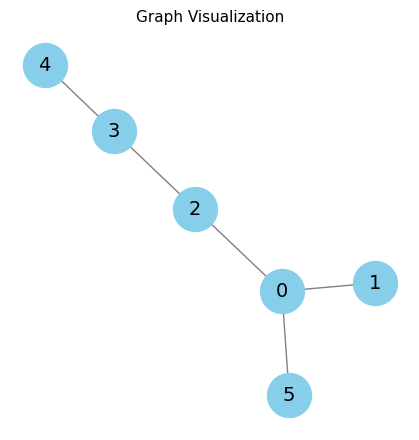

In [128]:
visualize_graph(edgelist)

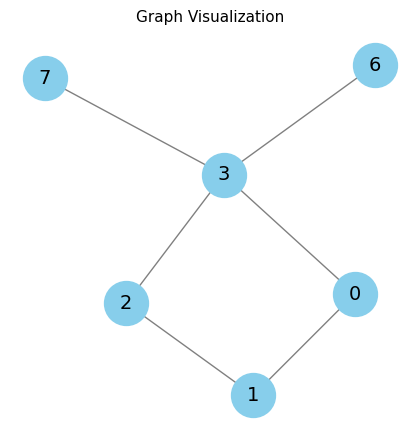

In [131]:
edgelist = [
    (1,0), (1,2), (0,3), (2,3), (3,6), (3,7)
]

visualize_graph(edgelist)

In [ ]:
g = Graph(edgelist)

bfs(g, src_node=3)

[3, 2, 7, 0, 6, 1]

### Depth First Search

In [136]:
edgelist = [
    (0,1), (0,4), (1,2), (2,3), (2, 5)
]

g = Graph(edgelist)

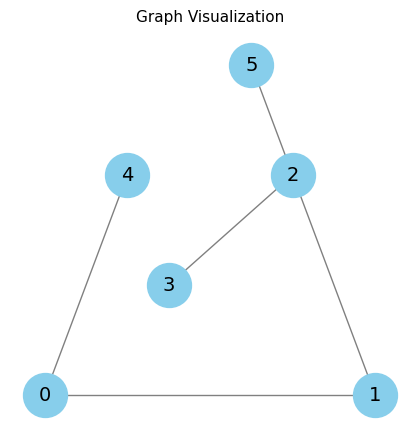

In [147]:
visualize_graph(edgelist)

In [163]:
def dfs(node: int, output: list, visited: set, adjacency_list: dict):
    """
    Recursive helper function to perform Depth-First Search (DFS)
    
    Args:
    - node: Current node being visited
    - output: List to collect traversal order
    - visited: Set to track already visited nodes
    - adjacency_list: Graph represented as an adjacency list
    """

    print(f"node: {node} | visited: {visited}")  # Debug: Show current node and visited set

    output.append(node)        # Add current node to traversal output
    visited.add(node)          # Mark current node as visited

    neighbors = adjacency_list[str(node)]  # Get neighbors of the current node

    # Recur for all unvisited neighbors
    for neighbor_ in neighbors:
        if int(neighbor_) not in visited:
            dfs(int(neighbor_), output, visited, adjacency_list)

    return


def dfs_traversal(g: Graph, src_node: int):
    """
    Wrapper function to initiate DFS traversal from a given source node

    Args:
    - g: Graph object
    - src_node: The starting node for DFS

    Returns:
    - List representing the DFS traversal order
    """

    adjacency_list = g.construct_adjacency_list()  # Build adjacency list from graph edges

    if not adjacency_list:
        return []  # Return [] for empty graph

    visited = set()     # Track visited nodes to prevent revisiting (avoid cycles)
    output = []         # Store traversal order

    # Start DFS traversal from the source node
    dfs(src_node, output, visited, adjacency_list)

    return output

In [164]:
dfs_traversal(g, 0)

node: 0 | visited: set()
node: 4 | visited: {0}
node: 3 | visited: {0, 4}
node: 2 | visited: {0, 3, 4}
node: 1 | visited: {0, 2, 3, 4}
node: 5 | visited: {0, 1, 2, 3, 4}


[0, 4, 3, 2, 1, 5]

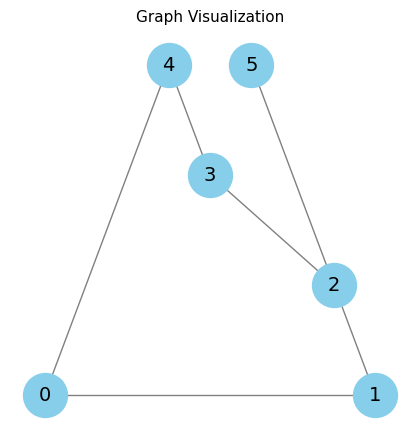

In [165]:
edgelist = [
    (0,1), (0,4), (1,2), (2,5), (2,3), (4,3)
]
visualize_graph(edgelist)

In [166]:
g = Graph(edgelist)

dfs_traversal(g, src_node=0)

node: 0 | visited: set()
node: 4 | visited: {0}
node: 3 | visited: {0, 4}
node: 2 | visited: {0, 3, 4}
node: 1 | visited: {0, 2, 3, 4}
node: 5 | visited: {0, 1, 2, 3, 4}


[0, 4, 3, 2, 1, 5]

### Find if Path Exists in Graph

> https://leetcode.com/problems/find-if-path-exists-in-graph/description/


---

In [212]:
edges = []
g = Graph(edgelist=edges)

In [213]:
adjacency_list = g.construct_adjacency_list()

In [214]:
adjacency_list

{}

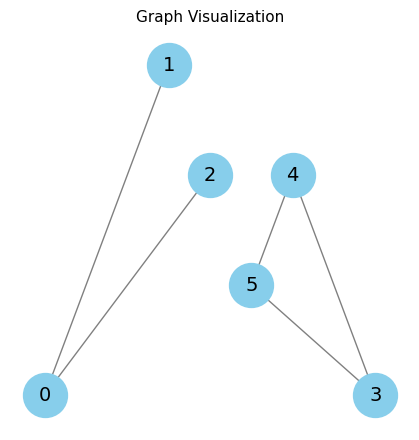

In [208]:
visualize_graph(edges)

In [ ]:
DST_FOUND = False

def dfs_till_destination(curr_node: int, dst: int, visited: set, adjacency_list: dict) -> bool:
    global DST_FOUND
    print(f"curr_node: {curr_node} | visited: {visited} | dst: {dst}")  # Debug: Show current node and visited set
    
    if DST_FOUND:
        return DST_FOUND
    
    if curr_node == dst:
        DST_FOUND = True

    visited.add(curr_node)

    neighbors = adjacency_list[str(curr_node)]

    for neighbor_ in neighbors:
        if int(neighbor_) not in visited:
            dfs_till_destination(
                curr_node=int(neighbor_),
                dst=dst,
                visited=visited,
                adjacency_list=adjacency_list
            )

    return DST_FOUND



def dfs_traversal(g: Graph, src_node: int, dst_node: int):
    """
    Wrapper function to initiate DFS traversal from a given source node

    Args:
    - g: Graph object
    - src_node: The starting node for DFS

    Returns:
    - List representing the DFS traversal order
    """

    adjacency_list = g.construct_adjacency_list()  # Build adjacency list from graph edges

    if not adjacency_list:
        return False
    
    if src_node == dst_node:
        return True

    visited = set()     # Track visited nodes to prevent revisiting (avoid cycles)

    path_found = dfs_till_destination(src_node, dst_node, visited, adjacency_list)

    return path_found

In [211]:
dfs_traversal(g, 0, 5)

curr_node: 0 | visited: set() | dst: 5
curr_node: 2 | visited: {0} | dst: 5
curr_node: 1 | visited: {0, 2} | dst: 5


False

### Steps By Knight



🧠 Intuition Behind the Approach

A knight in chess moves in an “L” shape: two squares in one direction and one square perpendicular. This gives it exactly 8 possible moves from any position.

To find the minimum number of moves a knight needs to go from a source to a destination on an N x N board, we model the board as a graph where each position is a node, and edges connect to valid knight moves.

This is a classic shortest path problem in an unweighted graph, making Breadth-First Search (BFS) the perfect choice because:
	•	BFS explores all positions level by level (i.e., by number of moves),
	•	The first time we reach the destination, it’s guaranteed to be the shortest path.

⸻

🔄 Example to Build Intuition

Say the knight starts at position (1, 3) and needs to reach (5, 0) on a 6x6 board.

BFS will explore like this:
	•	Step 0: (1, 3) → source
	•	Step 1: it explores all 8 valid positions the knight can jump to from (1, 3)
	•	Step 2: from each of those new positions, it explores further
	•	…
	•	The first time it reaches (5, 0), let’s say it took 3 levels — that’s the minimum number of moves.

Path (one possible valid path):

(1, 3) → (3, 4) → (4, 2) → (5, 0)

So the output is 3.

⸻

💡 Summary
	•	Think of the knight as moving on a graph.
	•	Use BFS to explore shortest paths from source.
	•	Track visited positions to prevent loops.
	•	Return the level when destination is found.

This approach guarantees correctness and efficiency for minimum-move problems like this.

In [ ]:
def get_neighbors(knightPos: tuple, N: int) -> list:
    """
    Given a knight's position and board size, return all valid moves from this position.
    A knight moves in 8 possible L-shaped directions.
    """

    i, j = knightPos

    # All 8 possible moves for a knight
    all_possible_neighbors = [
        (i-1, j+2), (i+1, j+2), (i-2, j+1), (i-2, j-1),
        (i+2, j+1), (i+2, j-1), (i-1, j-2), (i+1, j-2)
    ]

    # Keep only the valid moves within bounds of the board
    valid_neighbors = [
        (a, b) for a, b in all_possible_neighbors if 1 <= a <= N and 1 <= b <= N
    ]

    return valid_neighbors

In [254]:
get_neighbors((4,5), 6)

[(2, 6), (2, 4), (6, 6), (6, 4), (3, 3), (5, 3)]

queue: deque([(1, 0)])
curr_node: 1 | curr_level: 0
all_neighbors: ['2', '3', '4']
queue: deque([(2, 1), (3, 1), (4, 1)])
curr_node: 2 | curr_level: 1
all_neighbors: ['1', '5']
queue: deque([(3, 1), (4, 1), (5, 2)])
curr_node: 3 | curr_level: 1
all_neighbors: ['1']
queue: deque([(4, 1), (5, 2)])
curr_node: 4 | curr_level: 1
all_neighbors: ['1', '6']
queue: deque([(5, 2), (6, 2)])
curr_node: 5 | curr_level: 2


2

In [ ]:
def min_knight_moves(src: tuple, dst: tuple, N: int) -> int:
    """
    Return the minimum number of steps a knight needs to reach from src to dst on an NxN board.
    
    Args:
    - src: Starting position of the knight (1-based indexing)
    - dst: Target position
    - N: Size of the NxN chessboard
    
    Uses BFS for shortest path.
    """

    # Initialize BFS queue and visited set
    queue = deque()
    visited = set()

    # Push the source position along with level 0 (number of moves)
    queue.append((src, 0))
    visited.add(src)

    while queue:
        curr_node, curr_level = queue.popleft()

        # Print current exploration state (for dry-run)
        print(f"Visiting: {curr_node} at level: {curr_level}")

        # If we've reached the destination, return number of steps taken
        if curr_node == dst:
            return curr_level

        # Explore all valid neighbors (next knight moves)
        for neighbor in get_neighbors(curr_node, N):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, curr_level + 1))  # Increase move count

    # In case no path is found (should not happen on a valid board)
    return -1

In [274]:
min_knight_moves((3,3), (1,2), 3)

queue: deque([((3, 3), 0)])
curr_node: (3, 3) | curr_level: 0
all_neighbors: [(1, 2), (2, 1)]
queue: deque([((1, 2), 1), ((2, 1), 1)])
curr_node: (1, 2) | curr_level: 1


1

In [275]:
min_knight_moves((4,5), (1,1), 6)

queue: deque([((4, 5), 0)])
curr_node: (4, 5) | curr_level: 0
all_neighbors: [(2, 6), (2, 4), (6, 6), (6, 4), (3, 3), (5, 3)]
queue: deque([((2, 6), 1), ((2, 4), 1), ((6, 6), 1), ((6, 4), 1), ((3, 3), 1), ((5, 3), 1)])
curr_node: (2, 6) | curr_level: 1
all_neighbors: [(4, 5), (1, 4), (3, 4)]
queue: deque([((2, 4), 1), ((6, 6), 1), ((6, 4), 1), ((3, 3), 1), ((5, 3), 1), ((1, 4), 2), ((3, 4), 2)])
curr_node: (2, 4) | curr_level: 1
all_neighbors: [(1, 6), (3, 6), (4, 5), (4, 3), (1, 2), (3, 2)]
queue: deque([((6, 6), 1), ((6, 4), 1), ((3, 3), 1), ((5, 3), 1), ((1, 4), 2), ((3, 4), 2), ((1, 6), 2), ((3, 6), 2), ((4, 3), 2), ((1, 2), 2), ((3, 2), 2)])
curr_node: (6, 6) | curr_level: 1
all_neighbors: [(4, 5), (5, 4)]
queue: deque([((6, 4), 1), ((3, 3), 1), ((5, 3), 1), ((1, 4), 2), ((3, 4), 2), ((1, 6), 2), ((3, 6), 2), ((4, 3), 2), ((1, 2), 2), ((3, 2), 2), ((5, 4), 2)])
curr_node: (6, 4) | curr_level: 1
all_neighbors: [(5, 6), (4, 5), (4, 3), (5, 2)]
queue: deque([((3, 3), 1), ((5, 3), 1),

3

### BFS with Level Tracking


⸻

🧠 Intuition Behind the Approach

You are trying to find the shortest path (in terms of number of edges or “hops”) between two nodes in an unweighted graph represented using an adjacency list.

To solve this, you’re using Breadth-First Search (BFS) with level tracking. BFS is ideal here because it explores all nodes at distance k before exploring nodes at distance k+1, guaranteeing the shortest path is found.

You’re explicitly storing the current level (distance from source) with each node in the queue using tuples of the form (node, level).

⸻

🔄 Example to Build Intuition

Given the graph:

1: [2, 3, 4]
2: [1, 5]
3: [1]
4: [1, 6]
5: [2]
6: [4]

You are finding the shortest path from node 1 to node 5.

Let’s walk through the BFS steps:
	•	Start at node 1, level 0 → queue = [(1, 0)]
	•	From 1, neighbors are 2, 3, 4. Add them to the queue with level 1 → queue = [(2,1), (3,1), (4,1)]
	•	Pop 2, it’s not the destination. Its neighbor is 5, which hasn’t been visited → queue = [..., (5, 2)]
	•	Pop 5, it’s the destination! Return level 2.

So, the shortest path from 1 to 5 is:

1 → 2 → 5 (2 steps)


⸻

💡 Summary
	•	You are solving a shortest-path-in-unweighted-graph problem.
	•	BFS explores neighbors level-by-level, so the first time you reach the destination, it’s the shortest path.
	•	You’re using a visited set to prevent revisiting nodes and infinite loops.
	•	The level variable in the queue keeps track of the number of steps taken so far.

This structure is a classic template for:
	•	Finding minimum moves in games or grids.
	•	Checking shortest distance in graphs.
	•	Performing multi-source BFS (with slight tweaks).

In [15]:
def bfs_with_level(src: int, adjacency_list: dict):


    level = 0
    queue = deque()
    visited = set()

    queue.append(src)
    visited.add(src)
    output = {}
    

    while len(queue) > 0:

        size = len(queue)
        print (f"queue: {queue} | size: {size}")

        for _ in range(size):
            
            node = queue.popleft()
            output[node] = level
            print (f"popped node: {node} | level: {level}")
            neighbors = adjacency_list[str(node)]
            print (f"neighbors: {neighbors}")

            for neighbor_ in neighbors:
                if int(neighbor_) not in visited:
                    visited.add(int(neighbor_))
                    queue.append(int(neighbor_))

        level += 1

    return output

In [16]:
adjacency_list = {
    '1': ['2', '3', '4'],
    '2': ['1', '5'],
    '3': ['1'],
    '4': ['1', '6'],
    '5': ['2'],
    '6':['4']
}

In [17]:
bfs_with_level(src=1, adjacency_list=adjacency_list)

queue: deque([1]) | size: 1
popped node: 1 | level: 0
neighbors: ['2', '3', '4']
queue: deque([2, 3, 4]) | size: 3
popped node: 2 | level: 1
neighbors: ['1', '5']
popped node: 3 | level: 1
neighbors: ['1']
popped node: 4 | level: 1
neighbors: ['1', '6']
queue: deque([5, 6]) | size: 2
popped node: 5 | level: 2
neighbors: ['2']
popped node: 6 | level: 2
neighbors: ['4']


{1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2}